In [1]:
# Add all the imports for data visualization and machine-learning
import sklearn  
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the csv file into a pandas dataframe
df = pd.read_csv('WineQT.csv')

In [3]:
# Check the data types for each of the rows
print('------------Data types of each column---------------')
print(df.info())

------------Data types of each column---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [4]:
# Print out the first 5 rows just to Check view
print('------------First Five Rows---------------')
print(df.iloc[0:5,:])

------------First Five Rows---------------
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4       

In [5]:
#Data Visualization
#Drop ID Column because it is irrelevant
df=df.drop(columns=['Id'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None


In [6]:
# Describe the Dataset and check what (if any) values are null
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Check how many values in each column are null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


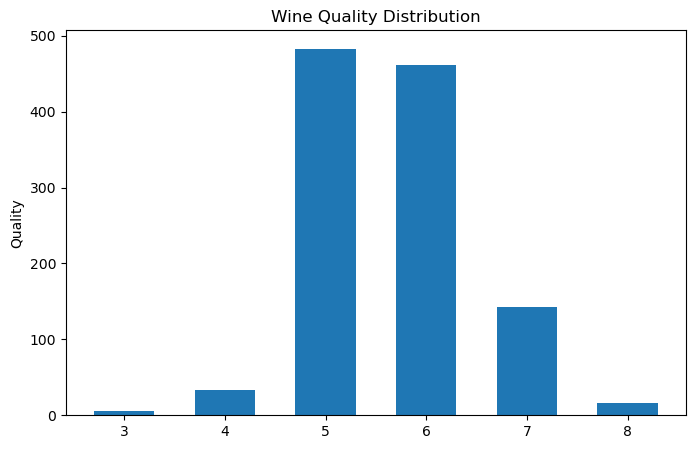

In [8]:
#Distribution of Wine Qualities
counts = df['quality'].value_counts()
print(counts)
x=[5,6,7,4,8,3]

plt.figure(figsize=(8,5))
plt.bar(x,height=counts,width=.6)
plt.ylabel("Quality")
plt.title("Wine Quality Distribution")
plt.show()

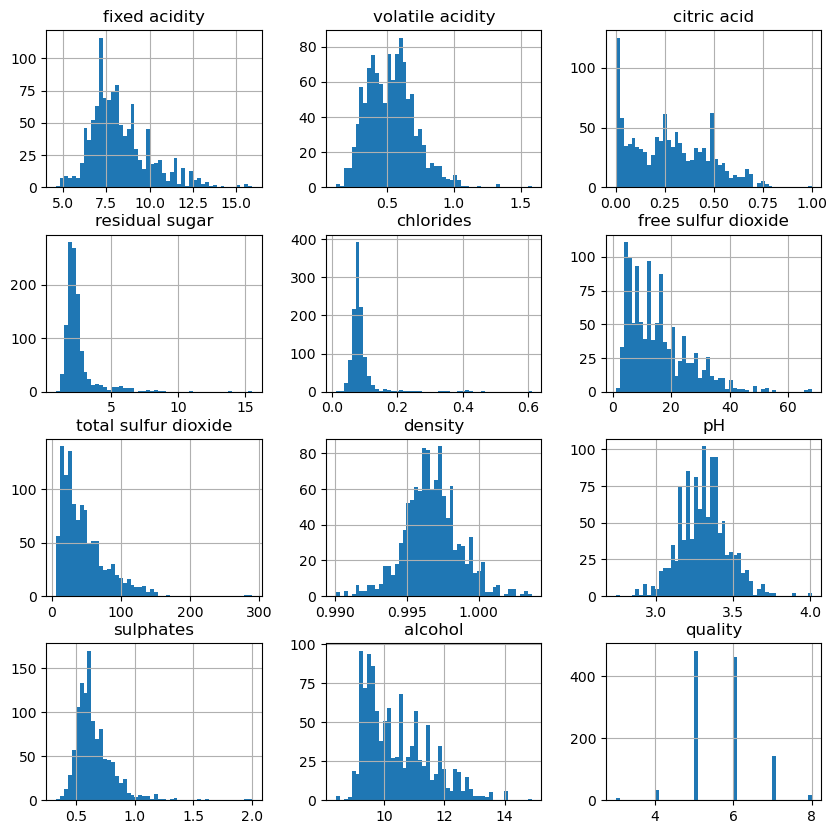

In [9]:
df.hist(bins=50,figsize=(10,10))
plt.show()

<AxesSubplot:>

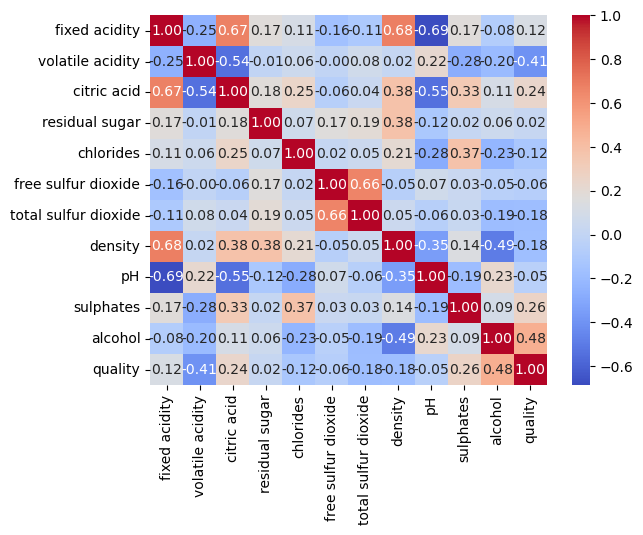

In [10]:
# Correlation heatmap
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap = "coolwarm", annot=True, fmt=".2f")
# Correlation between quality and residual sugar, free sulfer dioxide, or pH are all low (absolute value < 0.1)
# With that in mind we consider dropping these columns from the table
#df = df.drop(columns=["residual sugar"])
#df = df.drop(columns=["free sulfur dioxide"])
#df = df.drop(columns=["pH"])

In [11]:
# Split data into test, train and validation set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Get input features and output variables
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
y=df.iloc[:,[11]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 



In [12]:
# Neural Network imports
import tensorflow as tf
from tensorflow import keras

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

2023-05-02 16:14:54.197069: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(685, 11)
(229, 11)
(229, 11)


In [17]:
#Test Neural Networks

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
from tensorflow.keras.optimizers import Adam


model = keras.models.Sequential()


# The Input Layer :
model.add(keras.layers.Dense(11, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))


# The Hidden Layers :
model.add(keras.layers.Dense(210,kernel_initializer='normal', activation="relu"))
model.add(keras.layers.Dense(210,kernel_initializer='normal', activation="relu"))
model.add(keras.layers.Dense(210,kernel_initializer='normal', activation="relu"))
model.add(keras.layers.Dense(210,kernel_initializer='normal', activation="relu"))
model.add(keras.layers.Dense(210,kernel_initializer='normal', activation="relu"))
# The Output Layer :
model.add(keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=.007), metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [18]:
# Summary of initail neural network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 210)               2520      
                                                                 
 dense_2 (Dense)             (None, 210)               44310     
                                                                 
 dense_3 (Dense)             (None, 210)               44310     
                                                                 
 dense_4 (Dense)             (None, 210)               44310     
                                                                 
 dense_5 (Dense)             (None, 210)               44310     
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [19]:
#Train the first model on the dataset and validation data
history=model.fit(X_train, y_train, epochs=200,validation_data=(X_val, y_val))

Epoch 1/200
22/22 [==============================] - 1s 9ms/step - loss: 26.5307 - root_mean_squared_error: 5.1508 - val_loss: 6.7779 - val_root_mean_squared_error: 2.6034
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 2.5563 - root_mean_squared_error: 1.5988 - val_loss: 1.2433 - val_root_mean_squared_error: 1.1151
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6851 - root_mean_squared_error: 0.8277 - val_loss: 0.6806 - val_root_mean_squared_error: 0.8250
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6408 - root_mean_squared_error: 0.8005 - val_loss: 0.6905 - val_root_mean_squared_error: 0.8310
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 0.5789 - root_mean_squared_error: 0.7608 - val_loss: 0.5983 - val_root_mean_squared_error: 0.7735
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 0.5228 - root_mean_squared_error: 0.7230 - val_loss: 0.5667 - val_root_

Epoch 49/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4391 - root_mean_squared_error: 0.6627 - val_loss: 0.4872 - val_root_mean_squared_error: 0.6980
Epoch 50/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4788 - root_mean_squared_error: 0.6920 - val_loss: 0.5859 - val_root_mean_squared_error: 0.7654
Epoch 51/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6175 - root_mean_squared_error: 0.7858 - val_loss: 0.4790 - val_root_mean_squared_error: 0.6921
Epoch 52/200
22/22 [==============================] - 0s 4ms/step - loss: 0.4830 - root_mean_squared_error: 0.6950 - val_loss: 0.5909 - val_root_mean_squared_error: 0.7687
Epoch 53/200
22/22 [==============================] - 0s 3ms/step - loss: 0.5172 - root_mean_squared_error: 0.7192 - val_loss: 0.5389 - val_root_mean_squared_error: 0.7341
Epoch 54/200
22/22 [==============================] - 0s 3ms/step - loss: 0.6399 - root_mean_squared_error: 0.8000 - val_loss: 0.5517 - val_

22/22 [==============================] - 0s 3ms/step - loss: 0.4134 - root_mean_squared_error: 0.6430 - val_loss: 0.7104 - val_root_mean_squared_error: 0.8429
Epoch 144/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4473 - root_mean_squared_error: 0.6688 - val_loss: 0.7440 - val_root_mean_squared_error: 0.8626
Epoch 145/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4546 - root_mean_squared_error: 0.6743 - val_loss: 0.4959 - val_root_mean_squared_error: 0.7042
Epoch 146/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4459 - root_mean_squared_error: 0.6677 - val_loss: 0.5221 - val_root_mean_squared_error: 0.7226
Epoch 147/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4971 - root_mean_squared_error: 0.7051 - val_loss: 0.5024 - val_root_mean_squared_error: 0.7088
Epoch 148/200
22/22 [==============================] - 0s 3ms/step - loss: 0.4217 - root_mean_squared_error: 0.6494 - val_loss: 0.4926 - val_root_mea

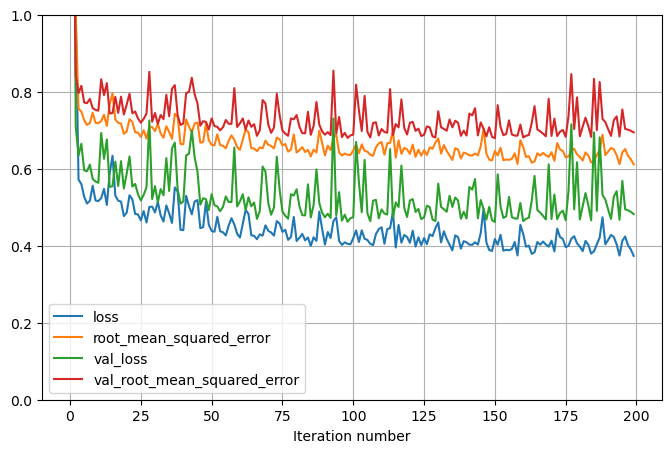

In [28]:
#Graph mean-squared error and val_mean_squared_error for each iteration
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("Iteration number")
plt.show()

In [13]:
#Build model with given parameters, user for tuning the NN
from tensorflow.keras.optimizers import Adam
def build_model(n_hidden=2, n_neurons=300, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(11, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,kernel_initializer='normal', activation="relu"))
    model.add(keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))
    #optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate), metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

In [14]:
#Really a Keras Regressor that is used to tun model
keras_clf = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras.backend.clear_session()

/var/folders/2s/3j85r405643347h001xfsm880000gn/T/ipykernel_2477/1197030481.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [15]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

#Tuning the model using randomSearch CV
param_distribs = {
    "n_hidden": [2, 3, 4, 5],
    "n_neurons": np.arange(200, 250).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, scoring='neg_root_mean_squared_error',n_iter=50, cv=5)
new_hist=rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_val, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
18/18 [==============================] - 1s 12ms/step - loss: 19.9100 - root_mean_squared_error: 4.4621 - val_loss: 0.7654 - val_root_mean_squared_error: 0.8749
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 1.9841 - root_mean_squared_error: 1.4086 - val_loss: 1.6847 - val_root_mean_squared_error: 1.2979
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.8706 - root_mean_squared_error: 0.9331 - val_loss: 0.8506 - val_root_mean_squared_error: 0.9223
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6981 - root_mean_squared_error: 0.8355 - val_loss: 0.8892 - val_root_mean_squared_error: 0.9430
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6688 - root_mean_squared_error: 0.8178 - val_loss: 0.7830 - val_root_mean_squared_error: 0.8849
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6880 - root_mean_squared_error: 0.8294 - val_loss: 0.8080 - val_root_mean_

Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8805 - root_mean_squared_error: 0.9384 - val_loss: 0.8953 - val_root_mean_squared_error: 0.9462
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8286 - root_mean_squared_error: 0.9103 - val_loss: 0.7702 - val_root_mean_squared_error: 0.8776
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 10ms/step - loss: 15.0492 - root_mean_squared_error: 3.8793 - val_loss: 6.0259 - val_root_mean_squared_error: 2.4548
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 1.9371 - root_mean_squared_error: 1.3918 - val_loss: 1.2156 - val_root_mean_squared_error: 1.1026
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.9379 - root_mean_squared_error: 0.9684 - val_loss: 0.7930 - val_root_mean_squared_error: 0.8905
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6785 - root

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 10ms/step - loss: 6.7450 - root_mean_squared_error: 2.5971 - val_loss: 0.8227 - val_root_mean_squared_error: 0.9070
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 0.7975 - root_mean_squared_error: 0.8931 - val_loss: 0.6380 - val_root_mean_squared_error: 0.7987
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5469 - root_mean_squared_error: 0.7395 - val_loss: 0.5796 - val_root_mean_squared_error: 0.7613
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6167 - root_mean_squared_error: 0.7853 - val_loss: 0.6059 - val_root_mean_squared_error: 0.7784
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.5294 - root_mean_squared_error: 0.7276 - val_loss: 0.6698 - val_root_mean_squared_error: 0.8184
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6860 - root_mean_squared

Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6120 - root_mean_squared_error: 0.7823 - val_loss: 0.7183 - val_root_mean_squared_error: 0.8475
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5515 - root_mean_squared_error: 0.7426 - val_loss: 0.6163 - val_root_mean_squared_error: 0.7851
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5996 - root_mean_squared_error: 0.7743 - val_loss: 1.0147 - val_root_mean_squared_error: 1.0073
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6222 - root_mean_squared_error: 0.7888 - val_loss: 0.5916 - val_root_mean_squared_error: 0.7692
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5439 - root_mean_squared_error: 0.7375 - val_loss: 0.5944 - val_root_mean_squared_error: 0.7710
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6003 - root_mean_squared_error: 0.7748 - val_loss: 0.7163 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 20.6805 - root_mean_squared_error: 4.5476 - val_loss: 4.2387 - val_root_mean_squared_error: 2.0588
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 2.7524 - root_mean_squared_error: 1.6590 - val_loss: 1.9145 - val_root_mean_squared_error: 1.3837
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.9498 - root_mean_squared_error: 0.9746 - val_loss: 0.7536 - val_root_mean_squared_error: 0.8681
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7211 - root_mean_squared_error: 0.8492 - val_loss: 0.8001 - val_root_mean_squared_error: 0.8945
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7153 - root_mean_squared_error: 0.8457 - val_loss: 0.7466 - val_root_mean_squared_error: 0.8641
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7238 - root_mean_squared

Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5705 - root_mean_squared_error: 0.7553 - val_loss: 1.2581 - val_root_mean_squared_error: 1.1217
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8538 - root_mean_squared_error: 0.9240 - val_loss: 0.7248 - val_root_mean_squared_error: 0.8514
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6097 - root_mean_squared_error: 0.7809 - val_loss: 0.6655 - val_root_mean_squared_error: 0.8158
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5610 - root_mean_squared_error: 0.7490 - val_loss: 0.6811 - val_root_mean_squared_error: 0.8253
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5302 - root_mean_squared_error: 0.7281 - val_loss: 0.6826 - val_root_mean_squared_error: 0.8262
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5449 - root_mean_squared_error: 0.7382 - val_loss: 0.5962 - val_root_mean_sq

5/5 [==============================] - 0s 2ms/step
Epoch 1/10
18/18 [==============================] - 1s 10ms/step - loss: 14.9267 - root_mean_squared_error: 3.8635 - val_loss: 0.9547 - val_root_mean_squared_error: 0.9771
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 1.6679 - root_mean_squared_error: 1.2915 - val_loss: 0.9126 - val_root_mean_squared_error: 0.9553
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7667 - root_mean_squared_error: 0.8756 - val_loss: 0.7511 - val_root_mean_squared_error: 0.8666
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7039 - root_mean_squared_error: 0.8390 - val_loss: 1.0063 - val_root_mean_squared_error: 1.0031
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6909 - root_mean_squared_error: 0.8312 - val_loss: 0.7489 - val_root_mean_squared_error: 0.8654
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6696 - root_mean_square

Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5476 - root_mean_squared_error: 0.7400 - val_loss: 0.6654 - val_root_mean_squared_error: 0.8157
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5204 - root_mean_squared_error: 0.7214 - val_loss: 0.6370 - val_root_mean_squared_error: 0.7981
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5202 - root_mean_squared_error: 0.7213 - val_loss: 0.6314 - val_root_mean_squared_error: 0.7946
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5221 - root_mean_squared_error: 0.7226 - val_loss: 0.5923 - val_root_mean_squared_error: 0.7696
Epoch 8/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5024 - root_mean_squared_error: 0.7088 - val_loss: 0.6199 - val_root_mean_squared_error: 0.7873
Epoch 9/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5423 - root_mean_squared_error: 0.7364 - val_loss: 0.5799 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 10ms/step - loss: 21.4551 - root_mean_squared_error: 4.6320 - val_loss: 14.8637 - val_root_mean_squared_error: 3.8553
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 8.1147 - root_mean_squared_error: 2.8486 - val_loss: 4.5829 - val_root_mean_squared_error: 2.1408
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 2.7107 - root_mean_squared_error: 1.6464 - val_loss: 1.1837 - val_root_mean_squared_error: 1.0880
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7747 - root_mean_squared_error: 0.8802 - val_loss: 0.9315 - val_root_mean_squared_error: 0.9651
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6876 - root_mean_squared_error: 0.8292 - val_loss: 0.7467 - val_root_mean_squared_error: 0.8641
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5689 - root_mean_squar

Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 2.2727 - root_mean_squared_error: 1.5076 - val_loss: 1.7778 - val_root_mean_squared_error: 1.3334
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 1.1574 - root_mean_squared_error: 1.0758 - val_loss: 1.0678 - val_root_mean_squared_error: 1.0334
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7816 - root_mean_squared_error: 0.8841 - val_loss: 0.9005 - val_root_mean_squared_error: 0.9490
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7297 - root_mean_squared_error: 0.8542 - val_loss: 0.8544 - val_root_mean_squared_error: 0.9243
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6994 - root_mean_squared_error: 0.8363 - val_loss: 0.8139 - val_root_mean_squared_error: 0.9022
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6809 - root_mean_squared_error: 0.8252 - val_loss: 0.7869 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 16.7241 - root_mean_squared_error: 4.0895 - val_loss: 12.1665 - val_root_mean_squared_error: 3.4880
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 5.4946 - root_mean_squared_error: 2.3441 - val_loss: 2.5801 - val_root_mean_squared_error: 1.6063
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 1.1729 - root_mean_squared_error: 1.0830 - val_loss: 0.9093 - val_root_mean_squared_error: 0.9536
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7326 - root_mean_squared_error: 0.8559 - val_loss: 0.8220 - val_root_mean_squared_error: 0.9066
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6517 - root_mean_squared_error: 0.8073 - val_loss: 0.7872 - val_root_mean_squared_error: 0.8872
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6334 - root_mean_square

Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6296 - root_mean_squared_error: 0.7935 - val_loss: 0.6980 - val_root_mean_squared_error: 0.8354
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5654 - root_mean_squared_error: 0.7519 - val_loss: 0.6548 - val_root_mean_squared_error: 0.8092
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5917 - root_mean_squared_error: 0.7692 - val_loss: 0.6585 - val_root_mean_squared_error: 0.8115
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5678 - root_mean_squared_error: 0.7535 - val_loss: 0.6604 - val_root_mean_squared_error: 0.8127
Epoch 8/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5324 - root_mean_squared_error: 0.7296 - val_loss: 0.6140 - val_root_mean_squared_error: 0.7836
Epoch 9/10
18/18 [==============================] - 0s 4ms/step - loss: 0.4999 - root_mean_squared_error: 0.7070 - val_loss: 0.6991 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 10ms/step - loss: 6.1728 - root_mean_squared_error: 2.4845 - val_loss: 0.7866 - val_root_mean_squared_error: 0.8869
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7860 - root_mean_squared_error: 0.8865 - val_loss: 0.8466 - val_root_mean_squared_error: 0.9201
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6868 - root_mean_squared_error: 0.8287 - val_loss: 0.6916 - val_root_mean_squared_error: 0.8316
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6752 - root_mean_squared_error: 0.8217 - val_loss: 1.1528 - val_root_mean_squared_error: 1.0737
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.9045 - root_mean_squared_error: 0.9511 - val_loss: 1.5957 - val_root_mean_squared_error: 1.2632
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8709 - root_mean_squared

Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6440 - root_mean_squared_error: 0.8025 - val_loss: 0.7354 - val_root_mean_squared_error: 0.8575
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6449 - root_mean_squared_error: 0.8031 - val_loss: 0.6929 - val_root_mean_squared_error: 0.8324
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5976 - root_mean_squared_error: 0.7730 - val_loss: 0.7809 - val_root_mean_squared_error: 0.8837
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6990 - root_mean_squared_error: 0.8361 - val_loss: 0.6849 - val_root_mean_squared_error: 0.8276
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6220 - root_mean_squared_error: 0.7887 - val_loss: 0.6720 - val_root_mean_squared_error: 0.8197
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6332 - root_mean_squared_error: 0.7957 - val_loss: 0.6717 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 10.9664 - root_mean_squared_error: 3.3116 - val_loss: 1.9596 - val_root_mean_squared_error: 1.3999
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.9525 - root_mean_squared_error: 0.9759 - val_loss: 0.8821 - val_root_mean_squared_error: 0.9392
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6731 - root_mean_squared_error: 0.8204 - val_loss: 1.0569 - val_root_mean_squared_error: 1.0281
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6915 - root_mean_squared_error: 0.8316 - val_loss: 0.6290 - val_root_mean_squared_error: 0.7931
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6352 - root_mean_squared_error: 0.7970 - val_loss: 0.7043 - val_root_mean_squared_error: 0.8392
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5707 - root_mean_squared

Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6673 - root_mean_squared_error: 0.8169 - val_loss: 0.6999 - val_root_mean_squared_error: 0.8366
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6382 - root_mean_squared_error: 0.7989 - val_loss: 0.7226 - val_root_mean_squared_error: 0.8500
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 12.0643 - root_mean_squared_error: 3.4734 - val_loss: 2.1601 - val_root_mean_squared_error: 1.4697
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 1.0746 - root_mean_squared_error: 1.0366 - val_loss: 0.6890 - val_root_mean_squared_error: 0.8300
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.7867 - root_mean_squared_error: 0.8870 - val_loss: 0.6968 - val_root_mean_squared_error: 0.8348
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6714 - root_

Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6994 - root_mean_squared_error: 0.8363 - val_loss: 0.7523 - val_root_mean_squared_error: 0.8673
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6672 - root_mean_squared_error: 0.8168 - val_loss: 0.9042 - val_root_mean_squared_error: 0.9509
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7250 - root_mean_squared_error: 0.8515 - val_loss: 0.7552 - val_root_mean_squared_error: 0.8690
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7502 - root_mean_squared_error: 0.8661 - val_loss: 0.7361 - val_root_mean_squared_error: 0.8579
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6671 - root_mean_squared_error: 0.8167 - val_loss: 0.7826 - val_root_mean_squared_error: 0.8847
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 36.0770 - root_

Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5640 - root_mean_squared_error: 0.7510 - val_loss: 0.6988 - val_root_mean_squared_error: 0.8360
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5902 - root_mean_squared_error: 0.7683 - val_loss: 0.5764 - val_root_mean_squared_error: 0.7592
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 11ms/step - loss: 13.4455 - root_mean_squared_error: 3.6668 - val_loss: 4.3901 - val_root_mean_squared_error: 2.0953
Epoch 2/10
18/18 [==============================] - 0s 11ms/step - loss: 1.5719 - root_mean_squared_error: 1.2538 - val_loss: 0.7842 - val_root_mean_squared_error: 0.8855
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6518 - root_mean_squared_error: 0.8073 - val_loss: 0.8917 - val_root_mean_squared_error: 0.9443
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.7479 - roo

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 16ms/step - loss: 28.0170 - root_mean_squared_error: 5.2931 - val_loss: 3.3708 - val_root_mean_squared_error: 1.8360
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 4.7298 - root_mean_squared_error: 2.1748 - val_loss: 1.0783 - val_root_mean_squared_error: 1.0384
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8802 - root_mean_squared_error: 0.9382 - val_loss: 0.7390 - val_root_mean_squared_error: 0.8596
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6283 - root_mean_squared_error: 0.7926 - val_loss: 0.7861 - val_root_mean_squared_error: 0.8866
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5832 - root_mean_squared_error: 0.7637 - val_loss: 0.7282 - val_root_mean_squared_error: 0.8533
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5911 - root_mean_square

Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6101 - root_mean_squared_error: 0.7811 - val_loss: 0.7677 - val_root_mean_squared_error: 0.8762
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6350 - root_mean_squared_error: 0.7969 - val_loss: 0.6896 - val_root_mean_squared_error: 0.8304
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5886 - root_mean_squared_error: 0.7672 - val_loss: 0.6624 - val_root_mean_squared_error: 0.8139
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5391 - root_mean_squared_error: 0.7342 - val_loss: 0.6486 - val_root_mean_squared_error: 0.8054
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5946 - root_mean_squared_error: 0.7711 - val_loss: 0.6394 - val_root_mean_squared_error: 0.7997
Epoch 9/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5214 - root_mean_squared_error: 0.7221 - val_loss: 0.6572 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 12ms/step - loss: 14.3343 - root_mean_squared_error: 3.7861 - val_loss: 7.7206 - val_root_mean_squared_error: 2.7786
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 2.5640 - root_mean_squared_error: 1.6013 - val_loss: 1.2293 - val_root_mean_squared_error: 1.1087
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.9384 - root_mean_squared_error: 0.9687 - val_loss: 0.7357 - val_root_mean_squared_error: 0.8577
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.7574 - root_mean_squared_error: 0.8703 - val_loss: 0.8881 - val_root_mean_squared_error: 0.9424
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.7681 - root_mean_squared_error: 0.8764 - val_loss: 0.6977 - val_root_mean_squared_error: 0.8353
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6388 - root_mean_square

Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 2.5390 - root_mean_squared_error: 1.5934 - val_loss: 1.3932 - val_root_mean_squared_error: 1.1803
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7798 - root_mean_squared_error: 0.8831 - val_loss: 0.7519 - val_root_mean_squared_error: 0.8671
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5846 - root_mean_squared_error: 0.7646 - val_loss: 0.7422 - val_root_mean_squared_error: 0.8615
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5699 - root_mean_squared_error: 0.7549 - val_loss: 0.6345 - val_root_mean_squared_error: 0.7965
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5485 - root_mean_squared_error: 0.7406 - val_loss: 0.7936 - val_root_mean_squared_error: 0.8908
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5393 - root_mean_squared_error: 0.7344 - val_loss: 0.5991 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 10ms/step - loss: 14.4423 - root_mean_squared_error: 3.8003 - val_loss: 3.9909 - val_root_mean_squared_error: 1.9977
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 2.3646 - root_mean_squared_error: 1.5377 - val_loss: 1.9283 - val_root_mean_squared_error: 1.3886
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 1.1246 - root_mean_squared_error: 1.0605 - val_loss: 0.7312 - val_root_mean_squared_error: 0.8551
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6721 - root_mean_squared_error: 0.8198 - val_loss: 1.1103 - val_root_mean_squared_error: 1.0537
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.7844 - root_mean_squared_error: 0.8856 - val_loss: 0.6864 - val_root_mean_squared_error: 0.8285
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5808 - root_mean_square

Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8516 - root_mean_squared_error: 0.9228 - val_loss: 0.7941 - val_root_mean_squared_error: 0.8911
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6364 - root_mean_squared_error: 0.7978 - val_loss: 0.5730 - val_root_mean_squared_error: 0.7570
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5707 - root_mean_squared_error: 0.7554 - val_loss: 0.6110 - val_root_mean_squared_error: 0.7816
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6242 - root_mean_squared_error: 0.7900 - val_loss: 0.5699 - val_root_mean_squared_error: 0.7549
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5939 - root_mean_squared_error: 0.7707 - val_loss: 0.7181 - val_root_mean_squared_error: 0.8474
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5552 - root_mean_squared_error: 0.7451 - val_loss: 0.5650 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 10ms/step - loss: 27.7532 - root_mean_squared_error: 5.2681 - val_loss: 3.0849 - val_root_mean_squared_error: 1.7564
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 1.8379 - root_mean_squared_error: 1.3557 - val_loss: 1.2430 - val_root_mean_squared_error: 1.1149
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8367 - root_mean_squared_error: 0.9147 - val_loss: 0.7531 - val_root_mean_squared_error: 0.8678
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7012 - root_mean_squared_error: 0.8374 - val_loss: 1.1130 - val_root_mean_squared_error: 1.0550
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7668 - root_mean_squared_error: 0.8757 - val_loss: 0.8713 - val_root_mean_squared_error: 0.9334
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7008 - root_mean_square

Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5651 - root_mean_squared_error: 0.7517 - val_loss: 0.7708 - val_root_mean_squared_error: 0.8779
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5959 - root_mean_squared_error: 0.7719 - val_loss: 0.6040 - val_root_mean_squared_error: 0.7772
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6766 - root_mean_squared_error: 0.8226 - val_loss: 0.8905 - val_root_mean_squared_error: 0.9437
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5523 - root_mean_squared_error: 0.7432 - val_loss: 0.5916 - val_root_mean_squared_error: 0.7692
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5008 - root_mean_squared_error: 0.7077 - val_loss: 0.5576 - val_root_mean_squared_error: 0.7468
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5550 - root_mean_squared_error: 0.7450 - val_loss: 0.6783 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 34.3121 - root_mean_squared_error: 5.8577 - val_loss: 0.8728 - val_root_mean_squared_error: 0.9343
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 2.1713 - root_mean_squared_error: 1.4735 - val_loss: 1.8784 - val_root_mean_squared_error: 1.3705
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 1.0720 - root_mean_squared_error: 1.0354 - val_loss: 0.8728 - val_root_mean_squared_error: 0.9342
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7037 - root_mean_squared_error: 0.8388 - val_loss: 0.7502 - val_root_mean_squared_error: 0.8661
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6668 - root_mean_squared_error: 0.8166 - val_loss: 0.7476 - val_root_mean_squared_error: 0.8647
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6594 - root_mean_squared

Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.9223 - root_mean_squared_error: 0.9604 - val_loss: 0.7472 - val_root_mean_squared_error: 0.8644
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6551 - root_mean_squared_error: 0.8094 - val_loss: 0.7633 - val_root_mean_squared_error: 0.8737
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6422 - root_mean_squared_error: 0.8014 - val_loss: 0.7894 - val_root_mean_squared_error: 0.8885
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6751 - root_mean_squared_error: 0.8216 - val_loss: 0.8065 - val_root_mean_squared_error: 0.8981
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6275 - root_mean_squared_error: 0.7922 - val_loss: 0.8086 - val_root_mean_squared_error: 0.8992
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6553 - root_mean_squared_error: 0.8095 - val_loss: 0.7525 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 30.4670 - root_mean_squared_error: 5.5197 - val_loss: 6.0602 - val_root_mean_squared_error: 2.4618
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 2.7990 - root_mean_squared_error: 1.6730 - val_loss: 1.7187 - val_root_mean_squared_error: 1.3110
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.9267 - root_mean_squared_error: 0.9627 - val_loss: 0.8383 - val_root_mean_squared_error: 0.9156
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7001 - root_mean_squared_error: 0.8367 - val_loss: 0.8531 - val_root_mean_squared_error: 0.9237
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6500 - root_mean_squared_error: 0.8062 - val_loss: 0.7481 - val_root_mean_squared_error: 0.8649
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6337 - root_mean_squared

Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6627 - root_mean_squared_error: 0.8140 - val_loss: 0.6199 - val_root_mean_squared_error: 0.7873
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5636 - root_mean_squared_error: 0.7507 - val_loss: 0.6789 - val_root_mean_squared_error: 0.8240
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6171 - root_mean_squared_error: 0.7855 - val_loss: 0.6633 - val_root_mean_squared_error: 0.8144
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5580 - root_mean_squared_error: 0.7470 - val_loss: 0.5607 - val_root_mean_squared_error: 0.7488
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4921 - root_mean_squared_error: 0.7015 - val_loss: 0.5450 - val_root_mean_squared_error: 0.7382
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4945 - root_mean_squared_error: 0.7032 - val_loss: 0.5258 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 10ms/step - loss: 57.3813 - root_mean_squared_error: 7.5750 - val_loss: 4.2691 - val_root_mean_squared_error: 2.0662
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 2.3170 - root_mean_squared_error: 1.5222 - val_loss: 1.1026 - val_root_mean_squared_error: 1.0501
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.9087 - root_mean_squared_error: 0.9532 - val_loss: 1.1347 - val_root_mean_squared_error: 1.0652
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7903 - root_mean_squared_error: 0.8890 - val_loss: 0.9165 - val_root_mean_squared_error: 0.9573
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7182 - root_mean_squared_error: 0.8475 - val_loss: 0.7799 - val_root_mean_squared_error: 0.8831
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6855 - root_mean_square

Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5338 - root_mean_squared_error: 0.7306 - val_loss: 0.6849 - val_root_mean_squared_error: 0.8276
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5796 - root_mean_squared_error: 0.7613 - val_loss: 0.9441 - val_root_mean_squared_error: 0.9716
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.7732 - root_mean_squared_error: 0.8793 - val_loss: 0.5651 - val_root_mean_squared_error: 0.7518
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.5000 - root_mean_squared_error: 0.7071 - val_loss: 0.6340 - val_root_mean_squared_error: 0.7963
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5453 - root_mean_squared_error: 0.7384 - val_loss: 0.6803 - val_root_mean_squared_error: 0.8248
Epoch 9/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6956 - root_mean_squared_error: 0.8340 - val_loss: 1.3123 - val_root_mean_sq

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 18.1738 - root_mean_squared_error: 4.2631 - val_loss: 9.0655 - val_root_mean_squared_error: 3.0109
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 4.1863 - root_mean_squared_error: 2.0460 - val_loss: 1.9114 - val_root_mean_squared_error: 1.3825
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 1.0375 - root_mean_squared_error: 1.0186 - val_loss: 0.8525 - val_root_mean_squared_error: 0.9233
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6230 - root_mean_squared_error: 0.7893 - val_loss: 0.7572 - val_root_mean_squared_error: 0.8702
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5916 - root_mean_squared_error: 0.7692 - val_loss: 0.6958 - val_root_mean_squared_error: 0.8342
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6140 - root_mean_squared

Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5202 - root_mean_squared_error: 0.7212 - val_loss: 0.6376 - val_root_mean_squared_error: 0.7985
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5195 - root_mean_squared_error: 0.7207 - val_loss: 0.6905 - val_root_mean_squared_error: 0.8310
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 6.6796 - root_mean_squared_error: 2.5845 - val_loss: 1.0208 - val_root_mean_squared_error: 1.0104
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8161 - root_mean_squared_error: 0.9034 - val_loss: 0.6450 - val_root_mean_squared_error: 0.8031
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5736 - root_mean_squared_error: 0.7574 - val_loss: 0.6157 - val_root_mean_squared_error: 0.7847
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5234 - root_m

5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 1s 9ms/step - loss: 28.3844 - root_mean_squared_error: 5.3277 - val_loss: 3.4860 - val_root_mean_squared_error: 1.8671
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 1.5440 - root_mean_squared_error: 1.2426 - val_loss: 1.0698 - val_root_mean_squared_error: 1.0343
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.8216 - root_mean_squared_error: 0.9064 - val_loss: 0.7623 - val_root_mean_squared_error: 0.8731
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7462 - root_mean_squared_error: 0.8638 - val_loss: 0.7719 - val_root_mean_squared_error: 0.8786
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7126 - root_mean_squared_error: 0.8441 - val_loss: 0.7490 - val_root_mean_squared_error: 0.8655
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6948 - root_mean_squared

18/18 [==============================] - 0s 3ms/step - loss: 5.8128 - root_mean_squared_error: 2.4110 - val_loss: 5.7813 - val_root_mean_squared_error: 2.4044
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 3.7347 - root_mean_squared_error: 1.9325 - val_loss: 3.0831 - val_root_mean_squared_error: 1.7559
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 1.6258 - root_mean_squared_error: 1.2751 - val_loss: 1.3666 - val_root_mean_squared_error: 1.1690
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.7892 - root_mean_squared_error: 0.8883 - val_loss: 0.9699 - val_root_mean_squared_error: 0.9848
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6977 - root_mean_squared_error: 0.8353 - val_loss: 0.8930 - val_root_mean_squared_error: 0.9450
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6234 - root_mean_squared_error: 0.7896 - val_loss: 0.7990 - val_root_mean_squared_error

In [16]:
# Print best score and best estimator.
score = rnd_search_cv.best_score_
best_model=rnd_search_cv.best_estimator_.model
print(score)
#print(rnd_search_cv.score(X_test, y_test))
print(best_model.evaluate(X_test,y_test))
print("Best Parameters")
print("-------------------------------")
print(rnd_search_cv.best_params_)

-0.7108849291321224
8/8 [==============================] - 0s 3ms/step - loss: 0.3915 - root_mean_squared_error: 0.6257
[0.3915281891822815, 0.6257221102714539]
Best Parameters
-------------------------------
{'n_neurons': 210, 'n_hidden': 5, 'learning_rate': 0.007195776942515736}


In [44]:
print(new_hist)

RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc1b23880a0>,
                   n_iter=50,
                   param_distributions={'learning_rate': [0.000865244663268553,
                                                          0.0005227030404168966,
                                                          0.00042759011629607904,
                                                          0.0074079630330042825,
                                                          0.0014350637104935814,
                                                          0.00844607235889304,
                                                          0.0004053535084552465,
                                                          0.0012814507818104531,
                                                          0.0035983536122387366,
                                                          0.011...
                                                   

In [13]:
#Ridge Regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
def ridgeMSE(deg, al):
    ridge = Ridge(al, solver = "sag", max_iter=15000, random_state=42)
    ridge = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
                        ("std_scaler", StandardScaler()),
                        ("ridge_reg", ridge),
                    ])
    ridge.fit(X_train, y_train)
    return mean_squared_error(y_train, ridge.predict(X_train)), mean_squared_error(y_val, ridge.predict(X_val)), mean_squared_error(y_test, ridge.predict(X_test))

In [14]:
alphas = [1, 5, 10, 100]
print("Alpha\t Degree\t Train RMSE\t\t Validation RMSE\t Test RMSE")
for i in range(1, 4):
    print("\n")
    for a in alphas:
        trainRMSE, valRMSE, testRMSE = ridgeMSE(i, a)
        print(a, "\t", i, "\t", trainRMSE, "\t", valRMSE, "\t", testRMSE)

Alpha	 Degree	 Train RMSE		 Validation RMSE	 Test RMSE


1 	 1 	 0.40567570662756625 	 0.46033054137784657 	 0.3830175465197602
5 	 1 	 0.4057106237538923 	 0.4590108949522006 	 0.3821239871222114
10 	 1 	 0.40580248981545974 	 0.45762281330398047 	 0.38109820050495175
100 	 1 	 0.4104099550574247 	 0.4513065848632768 	 0.3715815674194978


1 	 2 	 0.3651985707374475 	 0.45305368034440524 	 0.3924532170229054
5 	 2 	 0.3689910253279345 	 0.451630442215685 	 0.38791984115872297
10 	 2 	 0.37216133730235407 	 0.4520495136063731 	 0.38647222295148254
100 	 2 	 0.3876394544965149 	 0.45311413355746194 	 0.3862508448501562


1 	 3 	 0.3514790092827982 	 0.4585542136295086 	 0.3940930158285036
5 	 3 	 0.3538080940363844 	 0.45431157881372886 	 0.3892374170870173
10 	 3 	 0.3560939171228592 	 0.4507702424979159 	 0.38525003146747305
100 	 3 	 0.3713168369662804 	 0.44389940221762575 	 0.3797044039010361


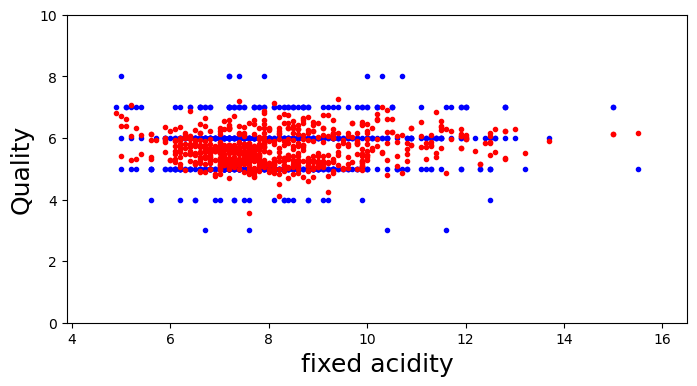

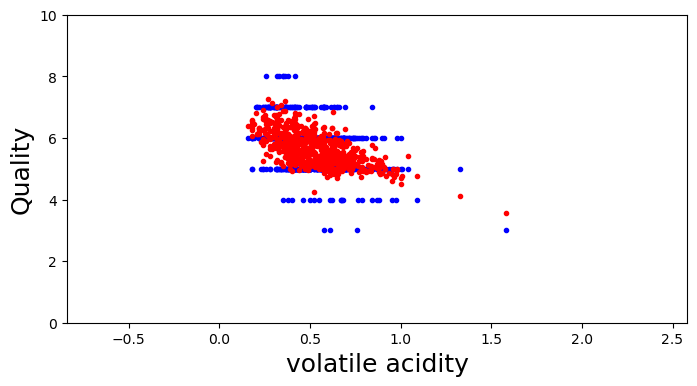

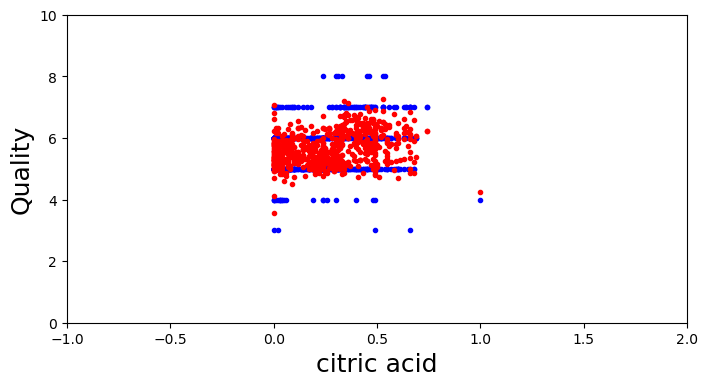

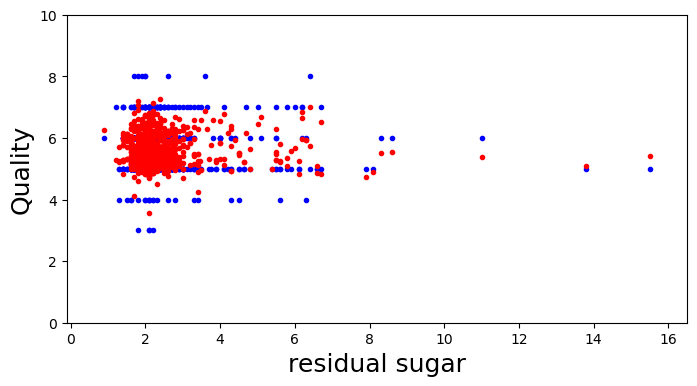

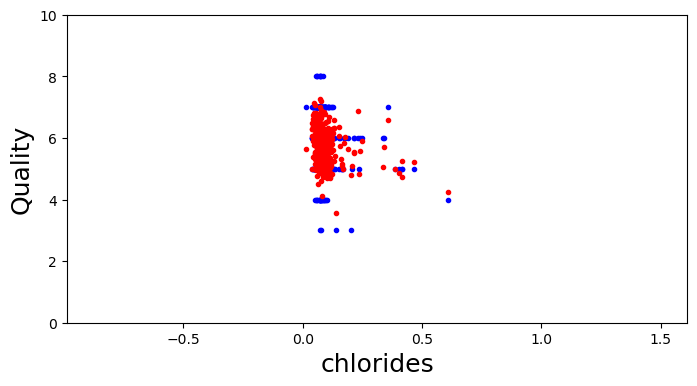

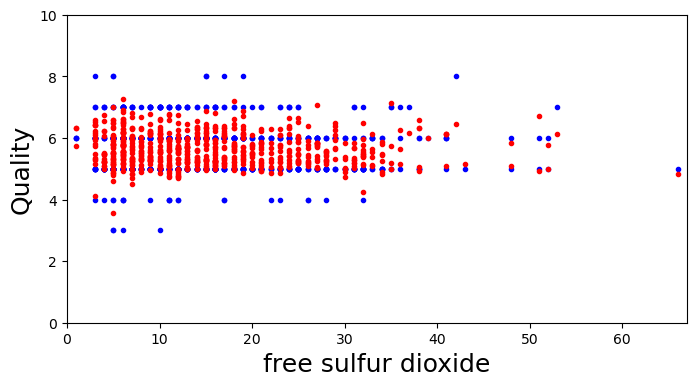

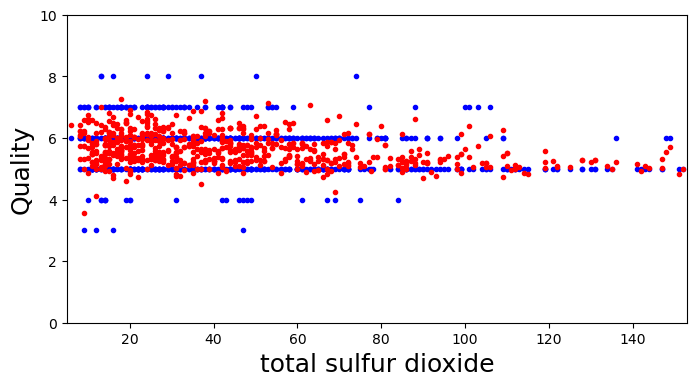

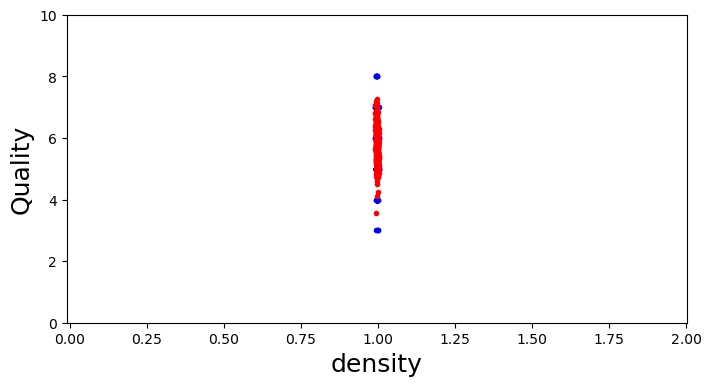

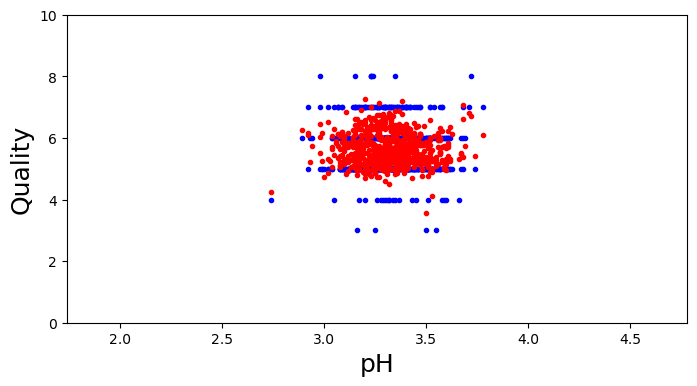

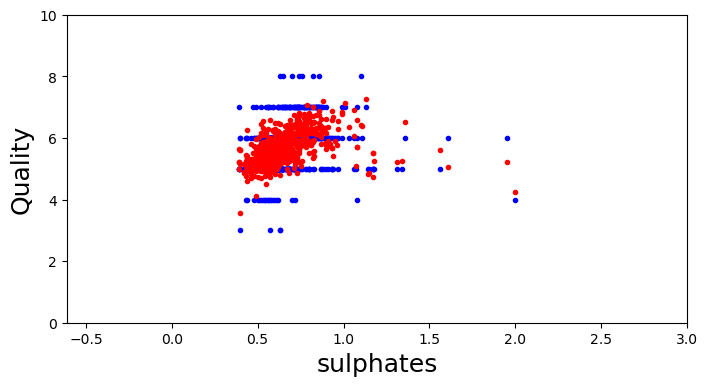

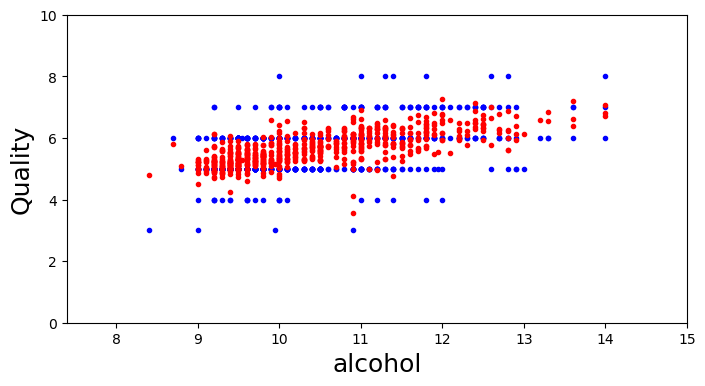

In [23]:
ridge = Ridge(100, solver = "sag", max_iter=15000, random_state=42)
ridge = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("ridge_reg", ridge),
                ])
ridge.fit(X_train, y_train)

for col in X.columns:
    plt.figure(figsize=(8,4))
    plt.plot(X_train[col], y_train, "b.")
    plt.plot(X_train[col], ridge.predict(X_train), "r.")
    plt.xlabel(col, fontsize=18)
    plt.ylabel("Quality", fontsize=18)
    plt.axis([np.min(X_train[col]) - 1, np.max(X_train[col]) + 1, 0, 10])
    plt.show()